In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split

# 사용자정의 함수: key를 입력하면 해당 데이터를 데이터프레임으로 읽어옴
from aiddd.data_manager import read_data, write_data
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred

plt_settings()

In [2]:
df_data = read_data('2nd pp cnts1')

In [3]:
# 속성컬럼과 타겟컬럼 정의
f_cols = [
    'year', 'month', 'day', 'dayofweek', 'dayofyear',
    '사번코드숫자', '사번숫자', '사업소코드', '계약전력', 
    'line_cnts', 'pole_cnts', 'sl_cnts'
]
t_col = '총공사비'

In [4]:
df_X = df_data[f_cols+[t_col]]
df_y = df_X.pop(t_col)

In [5]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.1)

In [6]:
def modeling_ml(model_type, start=0, size=50):
    model = models[model_type]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'Evaluation: {model_type}')
    _ = regression_evaluation(y_test, pred)
    f_importances(model, f_cols, model_type)
    plot_actual_pred(y_test[start:start+size], pred[start:start+size], model_type)

In [7]:
SEED = 123
models = {
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
}

Evaluation: DTR
R2_SCORE: 0.054804, MAPE: 34.619867, MSE: 29288278670906.445312, RMSE: 5411864.620527, MAE: 2273649.586226


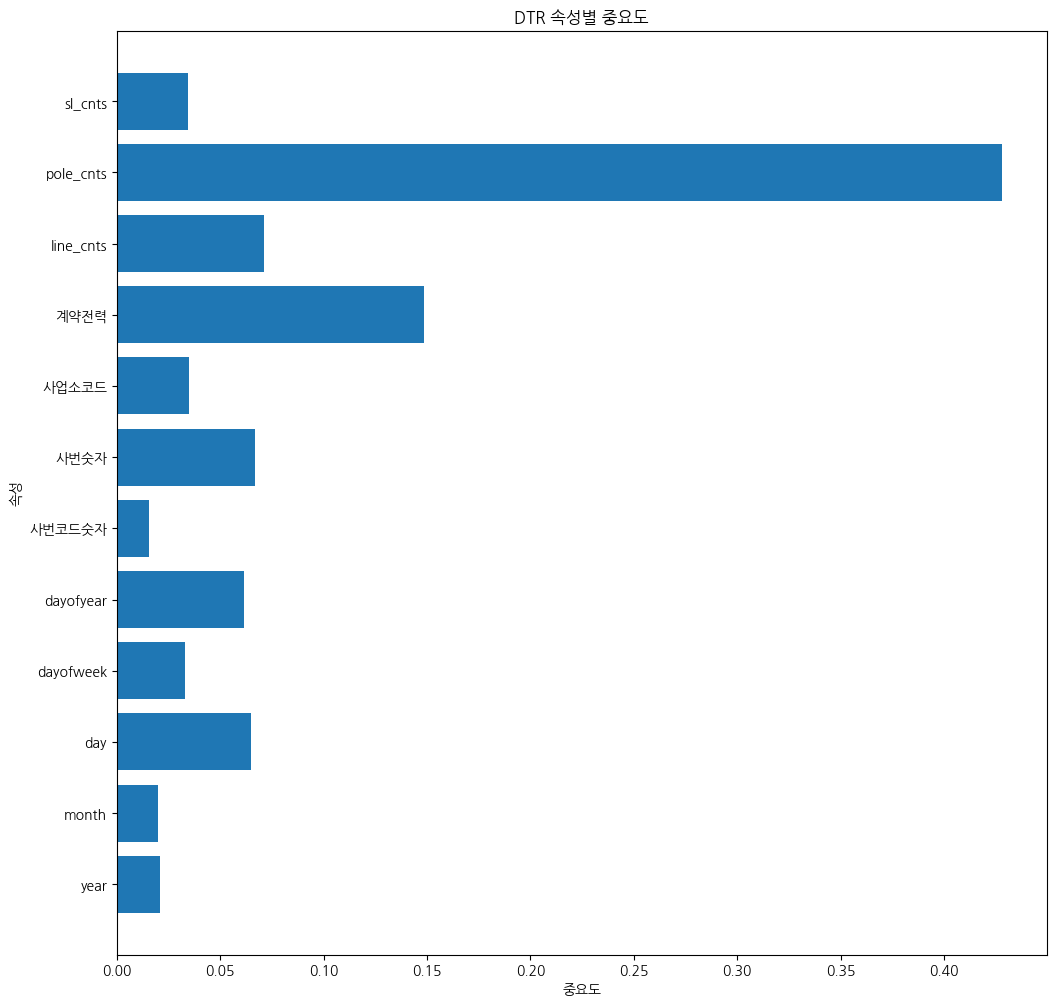

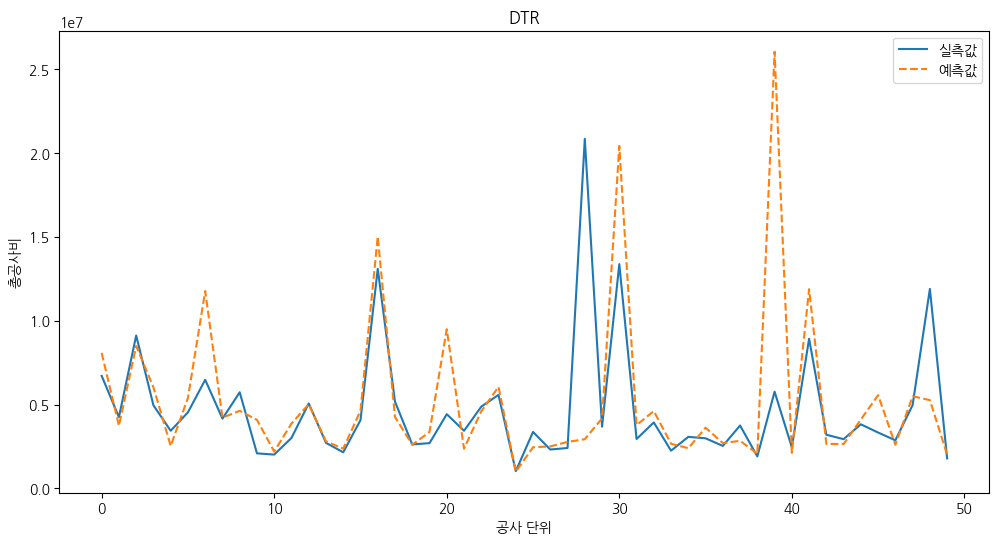

Evaluation: RFR
R2_SCORE: 0.553215, MAPE: 28.806978, MSE: 13844272488659.566406, RMSE: 3720789.229271, MAE: 1749049.209047


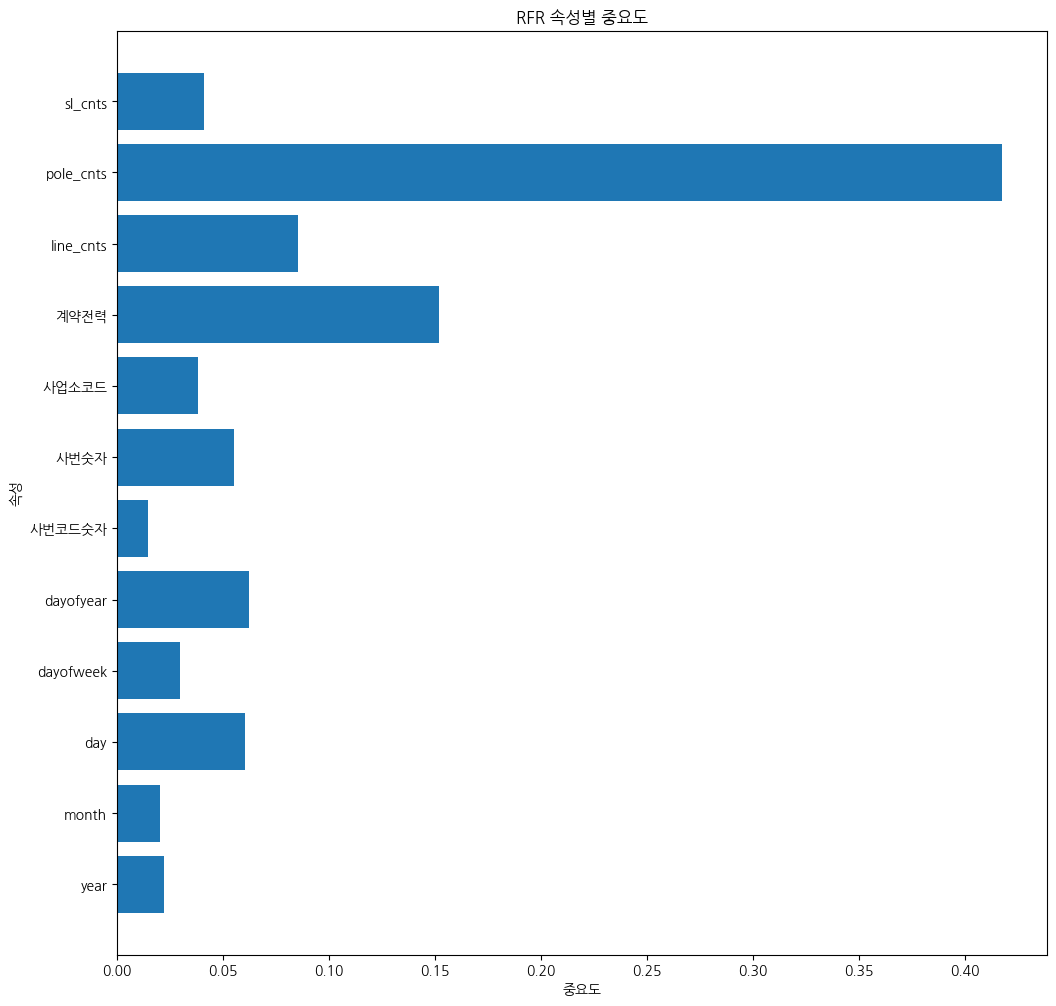

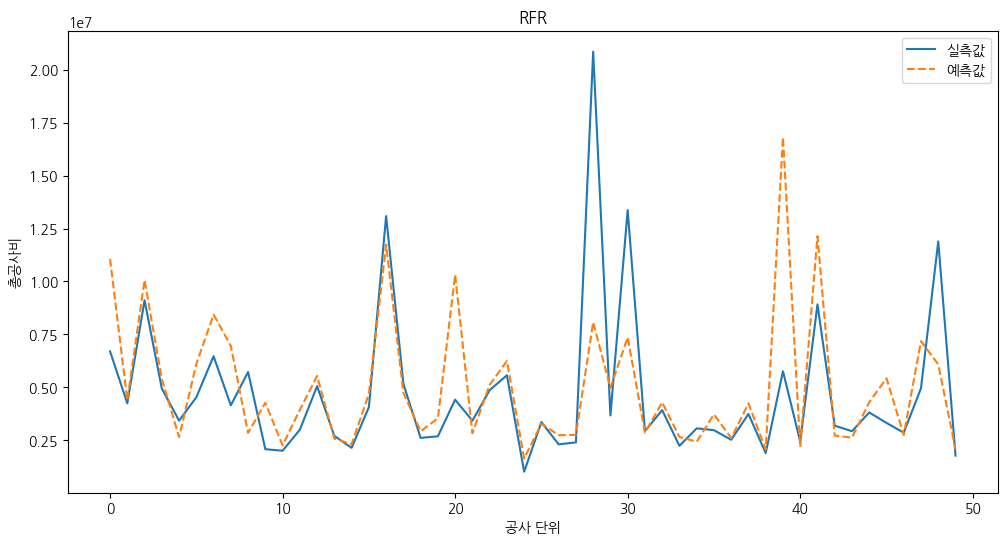

Evaluation: GBR
R2_SCORE: 0.572319, MAPE: 27.745535, MSE: 13252333917814.177734, RMSE: 3640375.518791, MAE: 1675821.932476


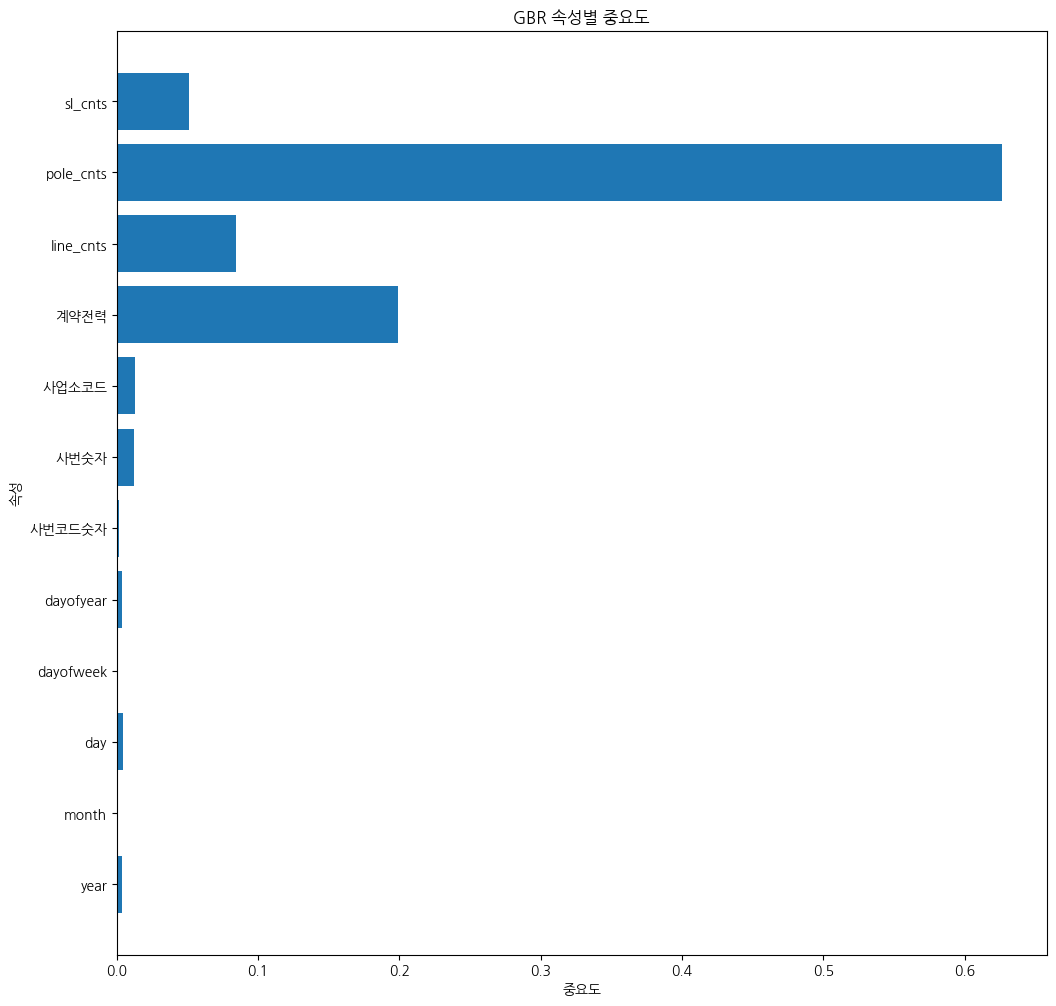

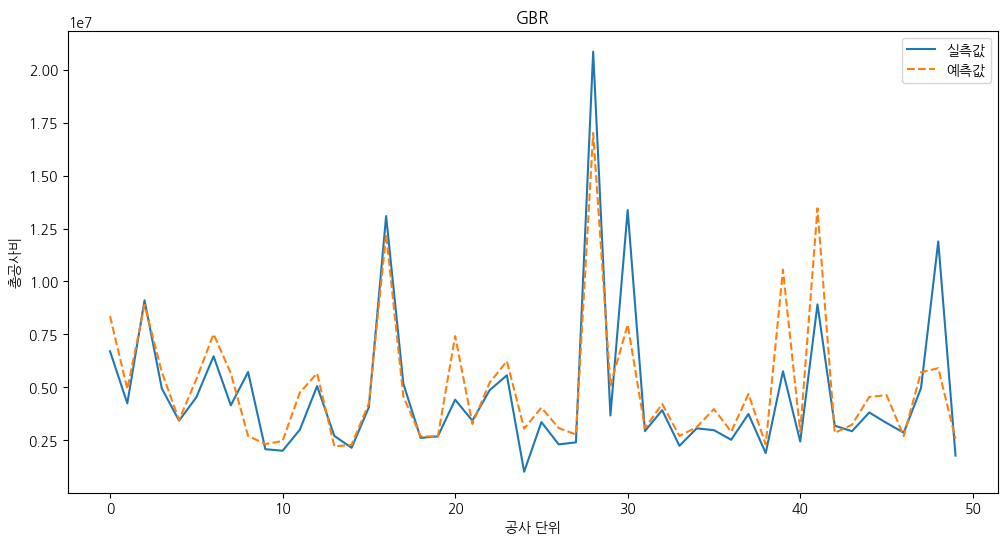

In [8]:
for m_type in models.keys():
    modeling_ml(m_type, 50, 50)